# Clasificación de especies de florez de iris

Supongamos que un botánico aficionado está interesado en distinguir las especies de algunas flores de iris que ha encontrado.

Ha recopilado algunas medidas asociadas con cada iris:   
* el largo y ancho de los pétalos   
* y el largo y ancho de los sépalos,   
todos medidos en centímetros 

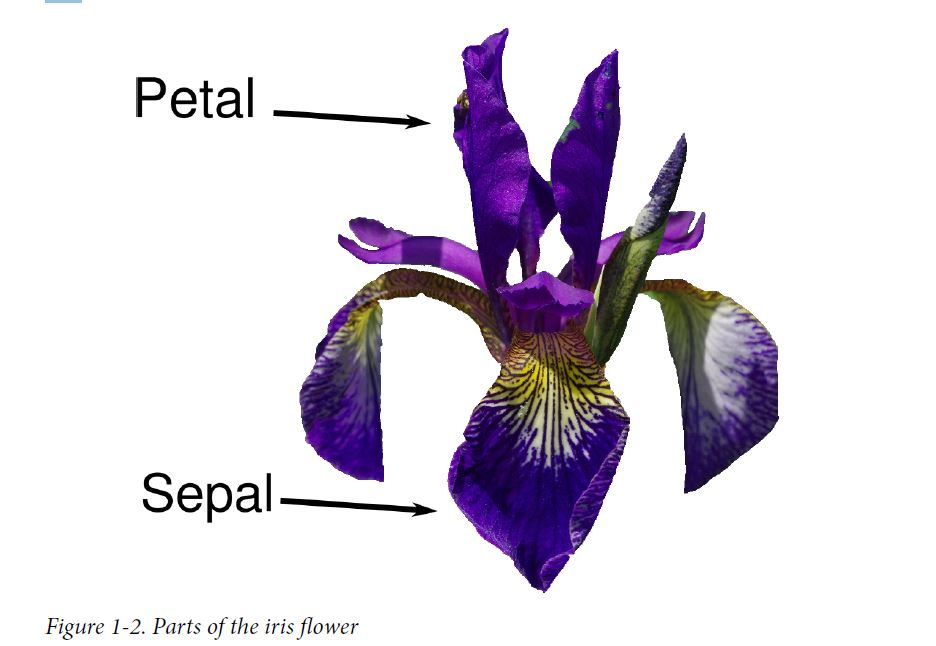

In [2]:
from IPython.display import Image
Image('parts_of_the_iris_flower.JPG', width = 400, height = 200) 

También tiene las medidas de algunos lirios que han sido previamente identificados por un botánico experto como pertenecientes a las especies:
* setosa,   
* versicolor  y 
* virginica.

La función `load_iris()` para la carga de los datos. 

In [3]:
from sklearn.datasets import load_iris 

In [4]:
X, y = load_iris(return_X_y=True)  # primera forma de importación de los datos de flores iris 

In [5]:
iris = load_iris()   # segunda forma de importación de los datos de flores de iris 

## Midiendo el éxito: datos de entrenamiento y prueba

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12) 

## Visualizar los datos con Pandas 

In [7]:
import pandas as pd 
iris_df = pd.DataFrame(X_train, columns = iris.feature_names) 

In [20]:
iris.target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
iris_df[100:-1]    

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
100,6.4,2.8,5.6,2.1
101,6.4,2.9,4.3,1.3
102,7.7,2.6,6.9,2.3
103,6.9,3.1,5.1,2.3
104,6.3,2.8,5.1,1.5
105,5.0,3.3,1.4,0.2
106,4.6,3.6,1.0,0.2
107,6.8,2.8,4.8,1.4
108,4.6,3.1,1.5,0.2
109,7.4,2.8,6.1,1.9


C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\plottin

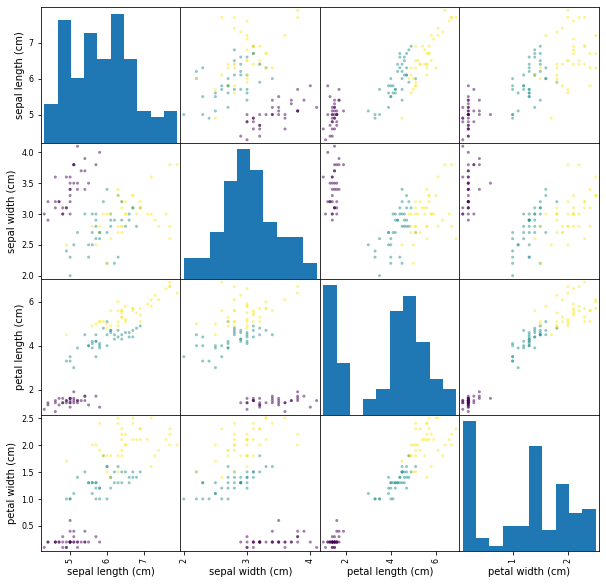

In [36]:

pd.plotting.scatter_matrix(iris_df, c = y_train, figsize = (10,10)) 
import matplotlib.pyplot as plt 
plt.savefig('scatter_matrix.png') 

In [16]:
iris.target_names[2]  

'virginica'

## Construyendo su primer modelo: k-Vecinos más cercanos

In [23]:
from sklearn.neighbors import KNeighborsClassifier  

In [24]:
knn = KNeighborsClassifier(n_neighbors=1) # construcción del objeto que contiene el algoritmo 

In [25]:
knn.fit(X_train, y_train)  # construcción del modelo a partir de los datos de entrenamiento 

KNeighborsClassifier(n_neighbors=1)

## Haciendo predicciones

In [26]:
import numpy as np  
X_new = np.array([[5,2.9,1.0,0.2]])


(1, 4)

In [29]:
iris.target_names[knn.predict(X_new)]  


array(['setosa'], dtype='<U10')

## Evaluación del modelo

In [30]:
y_pred = knn.predict(X_test) 

In [31]:
y_pred 

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1,
       2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1])

In [32]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [33]:
np.mean(y_pred == y_test) 

0.9736842105263158

También podemos usar el método `score()` del objeto `knn`, que calculará la precisión del conjunto de prueba para nosotros:

In [34]:
knn.score(X_test,y_test) 

0.9736842105263158

## Resumen y perspectiva

Las posibles especies se denominan clases en el problema de clasificación, y la especie de un solo iris se denomina etiqueta.

El conjunto de datos Iris consta de dos matrices NumPy: una que contiene los datos, que se denomina $X$ en scikit-learn, y otra que contiene las salidas correctas o deseadas, que se denomina $y$.

La matriz $X$ es una matriz bidimensional de características, con una fila por punto de datos y una columna por característica.

La matriz $y$ es una matriz unidimensional, que aquí contiene una etiqueta de clase, un número entero que va de 0 a 2, para cada una de las muestras.

Dividimos nuestro conjunto de datos en un conjunto de entrenamiento, para construir nuestro modelo, y un conjunto de prueba, para evaluar qué tan bien nuestro modelo se generalizará a datos nuevos, nunca antes vistos.

Elegimos el algoritmo de clasificación de los k vecinos más cercanos, que hace predicciones para un nuevo punto de datos considerando sus vecinos más cercanos en el conjunto de entrenamiento.

Esto se implementa en la clase `KNeighborsClassifier`, que contiene el algoritmo que construye el modelo, así como el algoritmo que hace una predicción usando el modelo.

Instanciamos la clase, estableciendo parámetros.

Luego construimos el modelo llamando al método de ajuste, pasando los datos de entrenamiento `(X_train)` y las salidas de entrenamiento `(y_train)` como parámetros.

Evaluamos el modelo utilizando el método de puntuación(`score()`), que calcula la precisión del modelo.

Aplicamos el método de puntuación a los datos del conjunto de prueba y las etiquetas del conjunto de prueba y descubrimos que nuestro modelo tiene una precisión de aproximadamente un 97%, lo que significa que es el $97\%$ correcto del tiempo en el conjunto de prueba.

Esto nos dio la confianza para aplicar el modelo a nuevos datos (en nuestro ejemplo, nuevas medidas de flores) y confiamos en que el modelo será correcto en el $97\%$ del tiempo.

A continuación, se muestra un resumen del código necesario para todo el procedimiento de capacitación y evaluación:

In [39]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], 
                                                   iris['target'],random_state= 513) 
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
knn.score(X_test,y_test) 

0.9736842105263158

Este fragmento contiene el código principal para aplicar cualquier algoritmo de aprendizaje automático mediante scikit-learn.

Los métodos `fit`,` predict` y `score` son la interfaz común para los modelos supervisados en scikit-learn, y con los conceptos presentados en este capítulo, puede aplicar estos modelos a muchas tareas de aprendizaje automático.

En el próximo capítulo, profundizaremos en los diferentes tipos de modelos supervisados en scikit-learn y cómo aplicarlos correctamente.